# Wstęp teoretyczny

Na zajęciach wgłebilismy się w programowanie obiektowe gdzie omówiono sam koncept tego i jak powinno się implementować obiekty w pythonie.

Samo programownie obiektowe polega na tworzeniu klas(typów), które grupują dane i funkcje, które je modyfikują. Klasa składa się z dwóch typów atrybutów, czyli:

   * pola - obiekty które posiada dana klasa
   * metody - funkcje w jakie wyposażona jest klasa

Sama konstrukcja klasy wygląda nastepująco:

class Klasa:  
 -konstruktor  
 -pola  
 -metody

Gdzie konstruktor to metoda, której zadaniem jest zainicjalizowanie pól konkretnej klasy.
Konstruktor zapisujemy nastepująco :` __init__(self....)`  
Self jest atrapą obiektu do której przypisujemy wartości poprzez odwołanie `self.pole = wartość`
Przykład:
```python
class Człowiek:
    def __init__(self,Imie):
        self.imie = Imie
```
Metody dzielimy na:

  * proste - atrybuty klasy, które można je przeciążać , ale odwoływac można sie do nich jedynie po utworzenia instancji danej klasy

  * statyczne - atrybuty klasy, które wystepują w jednym egzemplarzu na klase i do których można odwoływac sie bez tworzenia jej instancji

Definiujemy je w podobny sposób jak funkcje poprzedzając je słowem def
Przykład:
```python
def metoda(x):
        return x**2
    ```
Po utworzeniu takiego obiektu `f = Funkcja()` możemy się odwołać do niej w ten sposób `f.metoda(4)`

Do wypisywania elementów naszej klasy używa sie metody `def __str__(jakiś łańcuch znaków)`.

Póżniej zaczeliśmy nowy temat którym jest biblioteka numpy.

A szczególnie klase ndarray która reprezentuje tablice dowolnego wymiaru. Poniżej przedstawie kilka operacji jakie można wykonać na tej klasie:

   * tablica.ndim - Zwraca (int) liczbe wymiarów tabeli
   * tablica.size - Zwraca (int) liczbe elementów tablicy
   * tablica.shape - Zwraca (tuple) krotke z wymiarami tablicy



# Zadanie 2

In [290]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [1]:
class Statystyka2p:
    def __init__(self,k1,k2):
        self.k1 = k1
        self.k2 = k2
        self.s1 = len(k1)
        self.s2 = len(k2)
        
    def średnia_1(self):
        return sum(self.k1)/self.s1
    
    def średnia_2(self):
        return sum(self.k2)/self.s2
    
    def odchylenie_1(self):
        średnia = self.średnia_1()
        suma = [(((i - średnia)**2)/self.s1)**(1/2) for i in self.k1]
        return sum(suma)
    
    def odchylenie_2(self):
        średnia = self.średnia_2()
        suma = [(((i - średnia)**2)/self.s2)**(1/2) for i in self.k2]
        return sum(suma)
    
    def tStats(self):
        return (self.średnia_1()-self.średnia_2())/((self.odchylenie_1()/self.s1)+(self.odchylenie_2()/self.s2))**(1/2)
    
    def __str__(self):
        return f"Średnia 1 próbki wynosi {self.średnia_1():.2f} a odchylenie {self.odchylenie_1():.2f} \nŚrednia 2 próbki wynosi {self.średnia_2():.2f} a odchylenie {self.odchylenie_2():.2f} \nWartość statystyki t dla próbek wynosi {self.tStats():.2f} "

In [2]:
probka_1 = [2.23, 1.11, 3.33, 5.66, 9.21, 1.23, 3.33]
probka_2 = [1.23, 1.11, 1.33, 1.66, 1.21, 1.98, 1.13, 1.00]

Test = Statystyka2p(probka_1,probka_2)

In [3]:
print(Test)

Średnia 1 próbki wynosi 3.73 a odchylenie 5.60 
Średnia 2 próbki wynosi 1.33 a odchylenie 0.69 
Wartość statystyki t dla próbek wynosi 2.55 


Stworzyłem klase Statystyka2p która liczy znaną każdemu studentowi statystyke t rozkładu studenta.

# Zadanie 3

In [129]:
class Pochodna:
    def __init__(self,f,h=0.5):
        self.f = f
        self.h = h
    
    def __call__(self,x):
        return ((self.f(x+self.h)-self.f(x-self.h))/(2*self.h))
    

def f(x):
    return 0.15*x**2 + 1
def f3(x):
    return 0.15*x**2 + 1

def f2(x):
    return m.log(x)

df = Pochodna(f)
#Uwaga df(x) oblicza jej wartość w punkcie

for x in (1, 7, 15):
    df_wartosc = df(x)
    dokladne = 2*(0.15*x)
    err = abs(dokladne - df_wartosc)
    print(f"f'({x})={df_wartosc} (blad={err}) (dokladne={dokladne})")
    
# dla f(x) = ln(x) w punkcie x = 10

print("\n")

h = [0.5,0.1,10**(-3),10**(-5),10**(-7),10**(-9),10**(-11)]

df_2 = []
df_wartosc2 =[]
err2 = []
for i in h:
    df_2.append(Pochodna(f2,i))
    
    
for i in range(len(h)):
    df_wartosc2.append(df_2[i](10))
    dokladne = 1/10
    err2.append(abs(dokladne - df_wartosc2[i]))
    print(f"f'({10})={df_wartosc2[i]} (blad={err2[i]}) (dokladne={dokladne})")



f'(1)=0.2999999999999998 (blad=1.6653345369377348e-16) (dokladne=0.3)
f'(7)=2.1000000000000005 (blad=4.440892098500626e-16) (dokladne=2.1)
f'(15)=4.500000000000007 (blad=7.105427357601002e-15) (dokladne=4.5)


f'(10)=0.10008345855698231 (blad=8.345855698230209e-05) (dokladne=0.1)
f'(10)=0.10000333353334723 (blad=3.333533347221751e-06) (dokladne=0.1)
f'(10)=0.10000000033327794 (blad=3.332779330289526e-10) (dokladne=0.1)
f'(10)=0.09999999999177332 (blad=8.226683223533371e-12) (dokladne=0.1)
f'(10)=0.0999999993922529 (blad=6.077471026433301e-10) (dokladne=0.1)
f'(10)=0.1000000082740371 (blad=8.274037094357922e-09) (dokladne=0.1)
f'(10)=0.0999866855977416 (blad=1.331440225840752e-05) (dokladne=0.1)


Najpierw stworzono klase Pochodna gdzie spr jej funkcjonalność dla funkcji f(x), gdzie sprawdzono błedy aproksymacji. Kolenym zadaniem było analogiczne spr dla f(x) = ln(x) w punkcie x=10 i dla 
h = (0.5,0.1,10** (-3),10** (-5),10** (-7),10** (-9),10** (-11))

# Zadanie 4

In [286]:
class Minimaxi:
    def __init__(self,f,a,b,n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        
    def znajdz_maksima(self):
        self.P_min = []
        self.F_min = []
        self.P_max = []
        self.F_max = []
        x = []
        y = []
        h = (self.b-self.a)/(self.n-1)
        
        for i in range(0,self.n-1):
            x.append(self.a + i*h)
            self.x = x
        for i in range(0,self.n-1):
            y.append(self.f(x[i]))
            self.y = y  
            
        for i in range(1,self.n-2):
            if self.f(x[i-1])>self.f(x[i])<self.f(x[i+1]):
                self.P_min.append(x[i])
                self.F_min.append(self.f(x[i]))
                
            if self.f(x[i-1])<self.f(x[i])>self.f(x[i+1]):
                self.P_max.append(x[i])
                self.F_max.append(self.f(x[i]))
 
        if self.f(x[self.a]) < self.f(x[1]):
            self.P_min.append(x[self.a])
            self.F_min.append(self.f(x[self.a]))
        else:
            self.P_max.append(x[self.a])
            self.F_max.append(self.f(x[self.a]))
            
        if self.f(x[self.b]) < self.f(x[self.n-2]):
            self.P_min.append(x[self.b])
            self.F_min.append(self.f(x[self.b]))
        else:
            self.P_max.append(x[self.b])
            self.F_max.append(self.f(x[self.b]))
            
    def znajdz_min_globalne(self):
        return (self.P_min[self.F_min.index(min(self.F_min))]) 
        
    def znajdz_max_globalne(self):
        return (self.P_max[self.F_max.index(max(self.F_max))]) 
        
    def znajdz_min_lokalne(self):
        lista = [[self.P_min[i],self.F_min[i]] for i in range(len(self.P_min))]
        return lista
    
    def znajdz_max_lokalne(self):
        lista = [[self.P_max[i],self.F_max[i]] for i in range(len(self.P_max))]
        return lista
          
    def __str__(self):
        return f"Wszystkie maksima: {self.znajdz_max_lokalne()} \nWszystkie minima: {self.znajdz_min_lokalne()} \nMinimum globalne: {self.znajdz_min_globalne():.3f} \nMaksimum globalne: {self.znajdz_max_globalne():.3f}"

In [287]:
def f(x):
    return x**2*m.exp(-0.2*x)*m.sin(2*m.pi*x)

r = Minimaxi(f, 0, 5, 100)
r.znajdz_maksima()

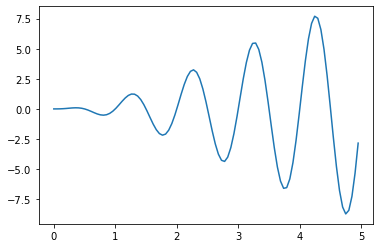

In [288]:
plt.plot(r.x,r.y)

In [289]:
print(r)

Wszystkie maksima: [[0.35353535353535354, 0.09267041721680026], [1.2626262626262625, 1.234557172680529], [2.2727272727272725, 3.245225813067198], [3.282828282828283, 5.470771013482886], [4.242424242424242, 7.695621809962182], [0.25252525252525254, 0.06062069265207443]] 
Wszystkie minima: [[0.8080808080808081, -0.518962767565008], [1.7676767676767677, -2.180635390592522], [2.7777777777777777, -4.359851983483792], [3.7373737373737375, -6.593876285996585], [4.747474747474747, -8.719874620158857], [0.0, 0.0]] 
Minimum globalne: 4.747 
Maksimum globalne: 4.242


Tutaj szukaliśmy ekstermów dla podanej funkcji w danym przedziale. Ja widzimy na wykresie nasze wyniki w przybliżeniu się zgadzają.

# Zadanie 5

In [93]:
sygnal_x = [0.     ,    0.03030303, 0.06060606, 0.09090909 ,0.12121212 ,0.15151515,
 0.18181818, 0.21212121, 0.24242424, 0.27272727, 0.3030303 , 0.33333333,
 0.36363636 ,0.39393939 ,0.42424242 ,0.45454545, 0.48484848, 0.51515152,
 0.54545455, 0.57575758, 0.60606061, 0.63636364, 0.66666667, 0.6969697,
 0.72727273, 0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
 0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303, 1.06060606,
 1.09090909, 1.12121212, 1.15151515, 1.18181818, 1.21212121, 1.24242424,
 1.27272727, 1.3030303,  1.33333333, 1.36363636, 1.39393939, 1.42424242,
 1.45454545, 1.48484848, 1.51515152, 1.54545455, 1.57575758, 1.60606061,
 1.63636364, 1.66666667, 1.6969697,  1.72727273, 1.75757576, 1.78787879,
 1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394, 1.96969697,
 2.        , 2.03030303, 2.06060606, 2.09090909, 2.12121212, 2.15151515,
 2.18181818, 2.21212121, 2.24242424, 2.27272727, 2.3030303,  2.33333333,
 2.36363636, 2.39393939, 2.42424242, 2.45454545, 2.48484848, 2.51515152,
 2.54545455, 2.57575758, 2.60606061, 2.63636364, 2.66666667, 2.6969697,
 2.72727273, 2.75757576, 2.78787879, 2.81818182, 2.84848485, 2.87878788,
 2.90909091, 2.93939394, 2.96969697, 3.]        

sygnal_y = [0.         ,0.03030303, 0.06060606, 0.09090909, 0.12121212, 0.15151515,
 0.18181818, 0.21212121, 0.24242424, 0.27272727 ,0.3030303,  0.33333333,
 0.36363636, 0.39393939, 0.42424242, 0.45454545, 0.48484848, 0.51515152,
 0.54545455, 0.57575758, 0.60606061, 0.63636364, 0.66666667, 0.6969697,
 0.72727273, 0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
 0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303, 1.06060606,
 1.09090909, 1.12121212, 1.15151515, 1.18181818, 1.21212121, 1.24242424,
 1.27272727, 1.3030303,  1.33333333, 1.36363636, 1.39393939, 1.42424242,
 1.45454545, 1.48484848, 1.51515152, 1.54545455, 1.57575758, 1.60606061,
 1.63636364, 1.66666667, 1.6969697,  1.72727273, 1.75757576, 1.78787879,
 1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394, 1.96969697,
 2.        , 2.03030303, 2.06060606, 2.09090909, 2.12121212, 2.15151515,
 2.18181818, 2.21212121, 2.24242424, 2.27272727, 2.3030303,  2.33333333,
 2.36363636, 2.39393939, 2.42424242, 2.45454545, 2.48484848, 2.51515152,
2.54545455, 2.57575758 ,2.60606061, 2.63636364, 2.66666667, 2.6969697,
 2.72727273, 2.75757576, 2.78787879 ,2.81818182, 2.84848485, 2.87878788,
 2.90909091, 2.93939394, 2.96969697 ,3.        ]


In [227]:
class Minimaxi_tab:
    def __init__(self,tab1,tab2):
        self.tab1 = tab1
        self.tab2 = tab2
        self.n = len(self.tab2)
        
    def znajdz_maksima(self):
        self.P_min = []
        self.F_min = []
        self.P_max = []
        self.F_max = []
        
        for i in range(1,self.n-2):
            if self.tab2[i-1]>self.tab2[i]<self.tab2[i+1]:
                self.P_min.append(self.tab1[i])
                self.F_min.append(self.tab2[i])
                
            if self.tab2[i-1]<self.tab2[i]>self.tab2[i+1]:
                self.P_max.append(self.tab1[i])
                self.F_max.append(self.tab2[i])
 
        if self.tab2[0] < self.tab2[1]:
            self.P_min.append(self.tab1[0])
            self.F_min.append(self.tab2[0])
        else:
            self.P_max.append(self.tab1[0])
            self.F_max.append(self.tab2[0])
            
        if self.tab2[self.n-1] < self.tab2[self.n-2]:
            self.P_min.append(self.tab1[self.n-1])
            self.F_min.append(self.tab2[self.n-1])
        else:
            self.P_max.append(self.tab1[self.n-1])
            self.F_max.append(self.tab2[self.n-1])
            
    def znajdz_min_globalne(self):
        return (self.P_min[self.F_min.index(min(self.F_min))]) 
        
    def znajdz_max_globalne(self):
        return (self.P_max[self.F_max.index(max(self.F_max))]) 
        
    def znajdz_min_lokalne(self):
        lista = [(self.P_min[i],self.F_min[i]) for i in range(len(self.P_min))]
        return lista
    
    def znajdz_max_lokalne(self):
        lista = [(self.P_max[i],self.F_max[i]) for i in range(len(self.P_max))]
        return lista
          
    def __str__(self):
        return f"Wszystkie maksima: {self.znajdz_max_lokalne()} \nWszystkie minima: {self.znajdz_min_lokalne()} \nMinimum globalne: {self.znajdz_min_globalne()} \nMaksimum globalne: {self.znajdz_max_globalne()}"

In [228]:
r = Minimaxi_tab(sygnal_x, sygnal_y)

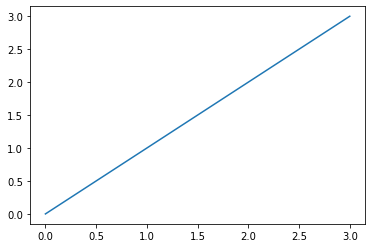

In [229]:
plt.plot(sygnal_x,sygnal_y)

In [230]:
r.znajdz_maksima()
print(r)

Wszystkie maksima: [(3.0, 3.0)] 
Wszystkie minima: [(0.0, 0.0)] 
Minimum globalne: 0.0 
Maksimum globalne: 3.0


Podobnie szukaliśmy extremów funkcji tylko dla danych z tablicy.

# Zadanie 6

In [124]:
class Bisekcja:
    def __init__(self,f,a,b,n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
    
    def Rozwiaz(self):
        for i in range(0,self.n):
            m = (self.a+self.b)/2
            if self.f(self.a)*self.f(m)<=0:
                self.b=m
            else:
                self.a=m
                
        return (self.a+self.b)/2
    
    def __str__(self):
        return f" Szukany pierwiastek: {self.Rozwiaz():.2f}"

In [125]:
def f(x):
    return x - 1 - m.sin(x)

r = Bisekcja(f, 0, 2, 100)
print(r)

 Szukany pierwiastek: 1.93


Stowrzono klase Bisekcja dzięki której policzylismy pierwiastek równania f(x) = 0.

# Zadanie 7

In [281]:
class Minimaxi2:
    def __init__(self,f,a,b,n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n

          
                
    def lepsze_ekstrema(self):
        self.P_min = []
        self.F_min = []
        self.P_max = []
        self.F_max = []
        x = []
        y = []
        h = (self.b-self.a)/(self.n-1)
        
        for i in range(0,self.n-1):
            x.append(self.a + i*h)
            self.x = x
        for i in range(0,self.n-1):
            y.append(self.f(x[i]))
            self.y = y  
        for i in range(1,self.n-2):
            df1 = 0
            df2 = 0
            b = 0
            rozw = 0
            if self.f(x[i-1])>self.f(x[i])<self.f(x[i+1]): #szukamy w przedzialu punktu gdzie wystepuje minimum
                df =Pochodna(self.f,h=(x[i+1] - x[i-1])) #tworze obiekt pochodnej funkcji w przedziale gdzie znaleziono minimum
                b = Bisekcja(df,x[i-1],x[i+1],self.n) #w tym przedziale licze bisekcje gdzie w ciele jest obiekt df 
                rozw = b.Rozwiaz() # tu rozwiazuje f'(x) = 0
                self.P_min.append(rozw)
                self.F_min.append(self.f(rozw))
                
            if self.f(x[i-1])<self.f(x[i])>self.f(x[i+1]): # Analogicznie
                df2 = Pochodna(self.f,h=(x[i+1]- x[i-1]))
                b = Bisekcja(df2,x[i-1],x[i+1],self.n)
                rozw = b.Rozwiaz()
                self.P_max.append(rozw)
                self.F_max.append(self.f(rozw))
            
        
    def znajdz_min_globalne(self):
        return (self.P_min[self.F_min.index(min(self.F_min))]) 
        
    def znajdz_max_globalne(self):
        return (self.P_max[self.F_max.index(max(self.F_max))]) 
        
    def znajdz_min_lokalne(self):
        lista = [[self.P_min[i],self.F_min[i]] for i in range(len(self.P_min))]
        return lista
    
    def znajdz_max_lokalne(self):
        lista = [[self.P_max[i],self.F_max[i]] for i in range(len(self.P_max))]
        return lista
          
    def __str__(self):
        return f"Wszystkie maksima: {self.znajdz_max_lokalne()} \nWszystkie minima: {self.znajdz_min_lokalne()} \nMinimum globalne: {self.znajdz_min_globalne():.3f} \nMaksimum globalne: {self.znajdz_max_globalne():.3f}"

In [282]:
def f(x):
    return x**2*m.exp(-0.2*x)*m.sin(2*m.pi*x)

r = Minimaxi2(f, 0, 5, 100)

In [283]:
r.lepsze_ekstrema()

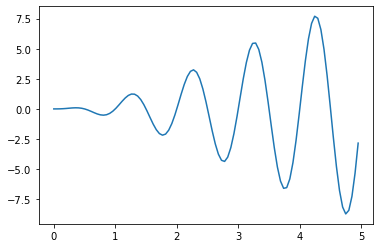

In [284]:
plt.plot(r.x,r.y)

In [285]:
print(r)

Wszystkie maksima: [[0.347989162085105, 0.09221404715943693], [1.2793145581738443, 1.2457358616219825], [2.264859856661917, 3.246861145124473], [3.25902179464354, 5.525878976826916], [4.255891654412807, 7.727187253848277]] 
Wszystkie minima: [[0.7982006532371304, -0.5183992817177845], [1.7701609918289472, -2.181611750943413], [2.761423633571124, -4.378165563024487], [3.757250682864493, -6.6517950049263765], [4.754816331034689, -8.731130959625283]] 
Minimum globalne: 4.755 
Maksimum globalne: 4.256


Tutaj mieliśmy istne combo gdzie ulepszyliśmy naszą Klase Minimaxi zużyciem wewnatrz niej obiektów z klasy Pochodna  i Bisekcja. W rezultacie dostaliśmy dokładniejsze ekstrema a konkretniej minimum i maximum globalne. 

# Wnioski

Na tych zajęciach doszlifowałem swoje umiejętności programowania obiektowego jak i utwierdziłem się w tym że znająć strukture klas można robić już ciekawsze projekty. Żałuje że nie miałem tego programu z liczenia ekstremów na 1 semestrze gdzie tego typu zadania się przewijały. Bardzo by to przyśpieszyło zdawanie :D

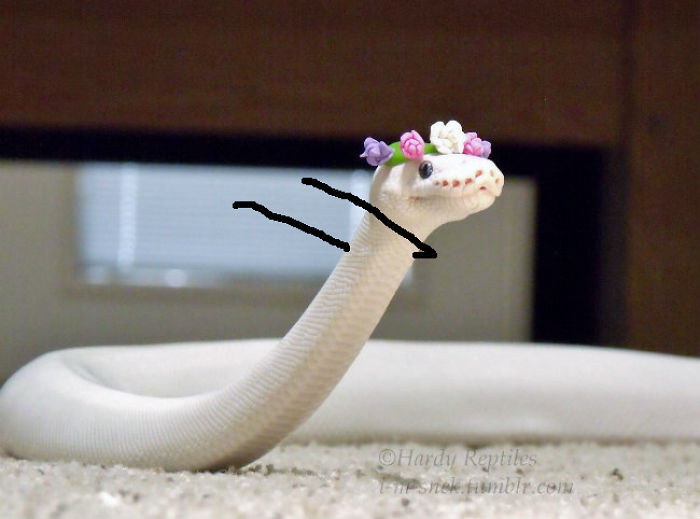